In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt 

data=pd.read_csv("GercekZamanliTuketim-01012016-01122020.csv", encoding ="ISO-8859-1")
data=data.apply(lambda x: x.str.replace('.',''))
data=data.apply(lambda x: x.str.replace(',','.'))
data['Tüketim Miktarý (MWh)'] = data['Tüketim Miktarý (MWh)'].astype(float)
data.insert(0,'Index',range(0,len(data)))


##Lag_168
lag_168_index=data[168:]['Index']-168
lag_168=data[data['Index'].isin(lag_168_index)]['Tüketim Miktarý (MWh)']


##Lag_48
lag_48_index=data[168:]['Index']-48
lag_48=data[data['Index'].isin(lag_48_index)]['Tüketim Miktarý (MWh)'].to_frame()
lag_48.reset_index(inplace = True)

Using the same logic in part a, I calculated lag_168 and lag_48 values for each observation in the data.

In [2]:
column_names = ["Date", "Hour", "Lag_48","Lag_168","Consumption"]
df = pd.DataFrame(columns = column_names)
df['Date']=data.iloc[168:,1]
df['Hour']=data.iloc[168:,2]
df['Consumption']=data.iloc[168:,3]
df.reset_index(inplace = True) 
df['Lag_168']=lag_168
df['Lag_48']=lag_48.loc[:,'Tüketim Miktarý (MWh)']

df.drop(df.loc[df['Date']=='27032016'].index, inplace=True)
df.drop(df.loc[df['Date']=='29032016'].index, inplace=True)
df.drop(df.loc[df['Date']=='03042016'].index, inplace=True)
df

,index,Date,Hour,Lag_48,Lag_168,Consumption
0,168,08012016,0:00,29189.27,26277.24,28602.02
1,169,08012016,1:00,27614.02,24991.82,27112.37
2,170,08012016,2:00,26578.97,23532.61,25975.34
3,171,08012016,3:00,25719.19,22464.78,25315.55
4,172,08012016,4:00,25864.63,22002.91,25128.15
...,...,...,...,...,...,...
42955,43123,01122020,19:00,36310.77,40895.17,40720.16
42956,43124,01122020,20:00,35383.08,39240.65,39195.74
42957,43125,01122020,21:00,34491.45,38366.41,38310.79
42958,43126,01122020,22:00,33698.14,37446.73,37173.97


Then I represented the data in the long format. And I removed 3 dates (27.03.2016, 29.03.2016 and 03.04.2016) from the data since there is a misleading hour consumption value on 27.03.2016.

In [3]:
train_data=df.iloc[0:42144,:]
test_data=df.iloc[42144:,:]

features=['Lag_48','Lag_168']
X_train = train_data.loc[:,features]
X_test = test_data.loc[:,features]

y_train = train_data.loc[:,'Consumption']
y_test = test_data.loc[:,'Consumption'].to_numpy()

I splitted the data into train and test data. My linear regression model will include aforementioned two features which are Lag_48 and Lag_168 and an intercept.

In [4]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

print("MAPE: ",MAPE(y_test,y_pred))
print(regr.coef_)
print(regr.intercept_)

MAPE:  4.231015002127865
[0.309055   0.64303152]
1570.1845382977372


I trained my model using the data till 1st of November, 2020 and test on the rest. And corresponding Mape, coefficient and intercept values can be found above.

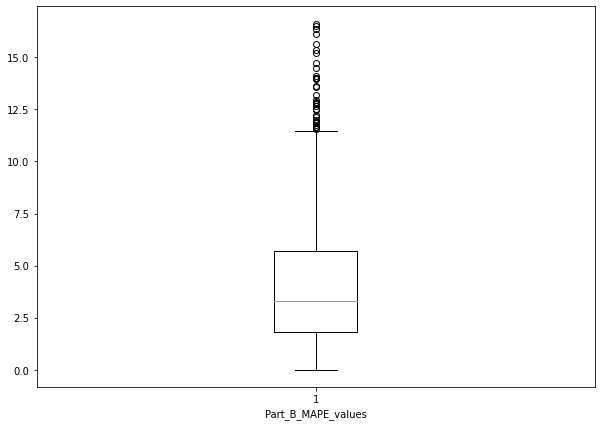

In [5]:
error=np.abs((y_test - y_pred)/y_test)*100
fig = plt.figure(figsize =(10, 7)) 
plt.boxplot(error)
plt.xlabel('Part_B_MAPE_values')  
plt.show() 